In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression
from statsmodels import api as sm
from scipy.stats import kstest

from google.colab import drive

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_frame = pd.read_csv('/content/drive/MyDrive/AnalData/Data_4_aggr.csv', sep=";")

In [ ]:
for c in data_frame.columns :
  data_frame[c] = data_frame[c].astype("string")
  data_frame[c] = data_frame[c].str.replace(',','.')
  data_frame[c] = pd.to_numeric(data_frame[c], errors='coerce')

In [ ]:
data_frame.fillna(data_frame.median())

,region,xh5_pin,overall_job_satisfaction,work_conditions_satisfaction,salary_satisfaction,professional_growth_satisfaction,workday_duration,second_job,mean_income,material_wellbeing_improved,...,ladder_power,ladder_respect,life_satisfaction_median,money_satisfaction_median,have_kids_proportion,weight_in_kilos,height_in_cm,health_evaluation,smokers_proportion,drank_alcohol_month
0,9,0.000000,2.0,2.0,2.0,2.0,0.000000,0.000000,54000.000000,0.000000,...,5.000000,8.000000,3.0,4.0,100.000000,100.000000,167.000000,3.0,100.000000,100.000000
1,10,33.333333,2.0,2.0,2.0,4.0,4.000000,0.000000,25333.333333,33.333333,...,6.000000,7.333333,2.0,2.0,66.666667,67.000000,160.000000,3.0,33.333333,66.666667
2,12,100.000000,2.0,2.0,2.0,2.0,0.000000,0.000000,42017.000000,0.000000,...,4.000000,6.000000,3.0,2.0,100.000000,80.000000,164.000000,4.0,0.000000,0.000000
3,14,0.000000,2.0,2.0,2.0,2.0,0.000000,33.333333,50000.000000,33.333333,...,5.333333,6.666667,3.0,3.0,100.000000,92.666667,176.333333,3.0,66.666667,33.333333
4,45,100.000000,2.0,2.0,3.0,3.0,0.000000,0.000000,14025.000000,0.000000,...,4.500000,6.500000,2.0,3.0,50.000000,67.750000,164.000000,3.0,0.000000,100.000000
5,46,16.666667,2.0,2.0,3.0,2.0,0.000000,0.000000,41360.000000,33.333333,...,3.333333,6.333333,2.0,3.5,100.000000,78.000000,178.666667,2.5,33.333333,83.333333
6,47,0.000000,4.0,4.0,4.0,4.0,0.000000,0.000000,40000.000000,0.000000,...,7.000000,9.000000,4.0,4.0,100.000000,91.000000,187.000000,2.0,0.000000,100.000000
7,48,50.000000,3.0,2.0,4.0,2.5,0.000000,0.000000,24000.000000,0.000000,...,5.000000,6.000000,2.5,3.0,50.000000,81.000000,178.500000,2.5,0.000000,50.000000
8,52,100.000000,2.0,2.0,2.5,2.0,0.000000,0.000000,16000.000000,0.000000,...,4.000000,6.000000,2.5,4.0,100.000000,56.000000,164.500000,3.0,0.000000,100.000000
9,66,0.000000,2.0,2.0,3.0,2.0,0.000000,0.000000,60000.000000,100.000000,...,6.000000,7.000000,2.0,1.0,0.000000,67.000000,172.000000,1.0,0.000000,0.000000


<AxesSubplot:>

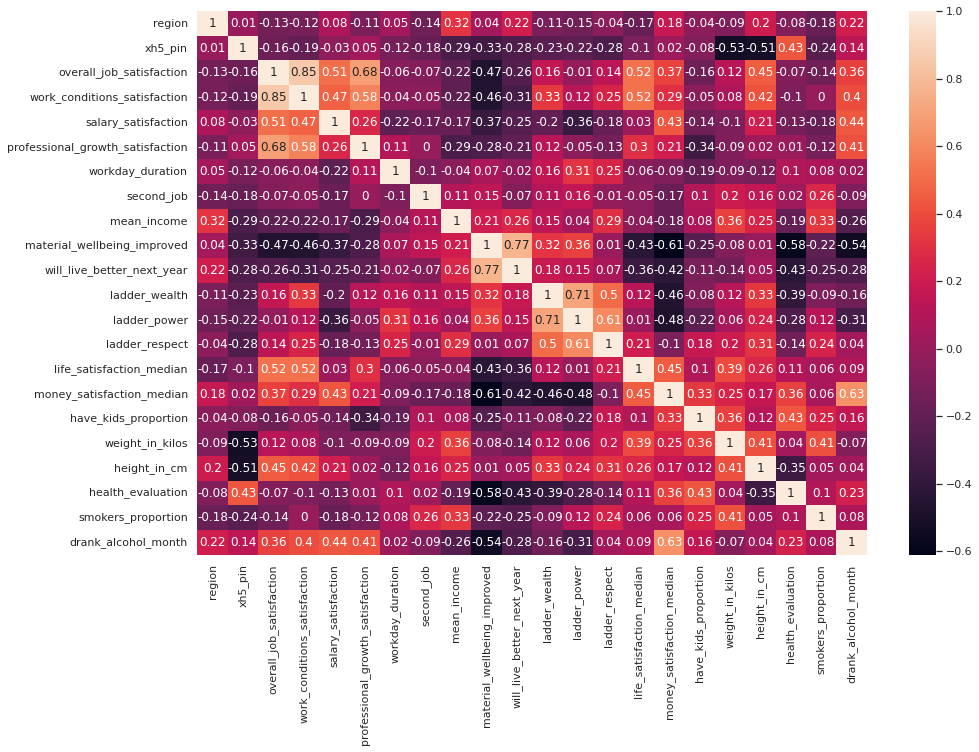

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
plot = sns.heatmap(data_frame.corr().round(2), annot = True)
plot

In [ ]:
def LR(pred ,*args):
    pack = pd.concat(list(data_frame[i] for i in args),axis = 1).to_numpy()
    reg = LinearRegression().fit(pack, data_frame[pred].to_numpy())
    data_pred = data_frame[pred]

    pack_const = sm.add_constant(pack)
    est = sm.OLS(data_pred, pack_const).fit()
    
    print(est.summary())
    print(f"Prediction score is: {reg.score(pack,data_pred)}")

In [ ]:
LR("life_satisfaction_median", "weight_in_kilos", "work_conditions_satisfaction")

                               OLS Regression Results                               
Dep. Variable:     life_satisfaction_median   R-squared:                       0.387
Model:                                  OLS   Adj. R-squared:                  0.346
Method:                       Least Squares   F-statistic:                     9.457
Date:                      Fri, 20 May 2022   Prob (F-statistic):           0.000654
Time:                              12:55:03   Log-Likelihood:                -27.563
No. Observations:                        33   AIC:                             61.13
Df Residuals:                            30   BIC:                             65.61
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
LR("life_satisfaction_median", "money_satisfaction_median", "work_conditions_satisfaction")

                               OLS Regression Results                               
Dep. Variable:     life_satisfaction_median   R-squared:                       0.367
Model:                                  OLS   Adj. R-squared:                  0.325
Method:                       Least Squares   F-statistic:                     8.711
Date:                      Fri, 20 May 2022   Prob (F-statistic):            0.00104
Time:                              12:55:03   Log-Likelihood:                -28.073
No. Observations:                        33   AIC:                             62.15
Df Residuals:                            30   BIC:                             66.64
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
LR("life_satisfaction_median", "material_wellbeing_improved", "work_conditions_satisfaction")

                               OLS Regression Results                               
Dep. Variable:     life_satisfaction_median   R-squared:                       0.312
Model:                                  OLS   Adj. R-squared:                  0.266
Method:                       Least Squares   F-statistic:                     6.800
Date:                      Fri, 20 May 2022   Prob (F-statistic):            0.00367
Time:                              12:55:03   Log-Likelihood:                -29.460
No. Observations:                        33   AIC:                             64.92
Df Residuals:                            30   BIC:                             69.41
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
LR("life_satisfaction_median", "material_wellbeing_improved", "work_conditions_satisfaction", "money_satisfaction_median")

                               OLS Regression Results                               
Dep. Variable:     life_satisfaction_median   R-squared:                       0.369
Model:                                  OLS   Adj. R-squared:                  0.304
Method:                       Least Squares   F-statistic:                     5.661
Date:                      Fri, 20 May 2022   Prob (F-statistic):            0.00352
Time:                              12:55:03   Log-Likelihood:                -28.023
No. Observations:                        33   AIC:                             64.05
Df Residuals:                            29   BIC:                             70.03
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

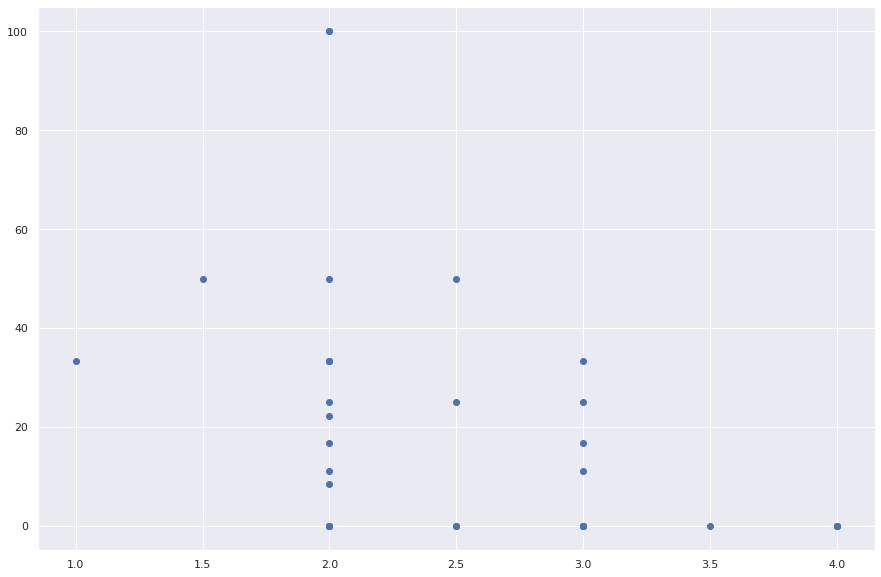

In [ ]:
plt.scatter(data_frame['life_satisfaction_median'],data_frame['material_wellbeing_improved'])

In [ ]:
LR('life_satisfaction_median','money_satisfaction_median')

                               OLS Regression Results                               
Dep. Variable:     life_satisfaction_median   R-squared:                       0.205
Model:                                  OLS   Adj. R-squared:                  0.180
Method:                       Least Squares   F-statistic:                     8.011
Date:                      Fri, 20 May 2022   Prob (F-statistic):            0.00809
Time:                              12:55:03   Log-Likelihood:                -31.836
No. Observations:                        33   AIC:                             67.67
Df Residuals:                            31   BIC:                             70.67
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
LR('life_satisfaction_median','work_conditions_satisfaction')

                               OLS Regression Results                               
Dep. Variable:     life_satisfaction_median   R-squared:                       0.265
Model:                                  OLS   Adj. R-squared:                  0.242
Method:                       Least Squares   F-statistic:                     11.20
Date:                      Fri, 20 May 2022   Prob (F-statistic):            0.00216
Time:                              12:55:03   Log-Likelihood:                -30.541
No. Observations:                        33   AIC:                             65.08
Df Residuals:                            31   BIC:                             68.08
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

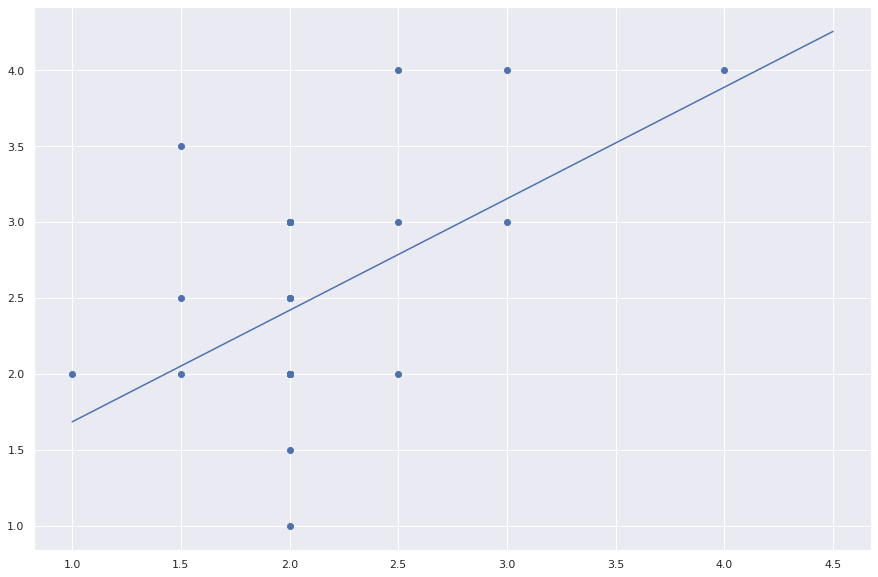

In [ ]:
plt.scatter(data_frame['work_conditions_satisfaction'],data_frame['life_satisfaction_median'])
x = np.arange(1,5,0.5)
y = x* 0.7348+0.9484
plt.plot(x,y)
plt.show()

In [ ]:
LR("life_satisfaction_median", "material_wellbeing_improved")

                               OLS Regression Results                               
Dep. Variable:     life_satisfaction_median   R-squared:                       0.185
Model:                                  OLS   Adj. R-squared:                  0.159
Method:                       Least Squares   F-statistic:                     7.042
Date:                      Fri, 20 May 2022   Prob (F-statistic):             0.0124
Time:                              12:55:04   Log-Likelihood:                -32.251
No. Observations:                        33   AIC:                             68.50
Df Residuals:                            31   BIC:                             71.49
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

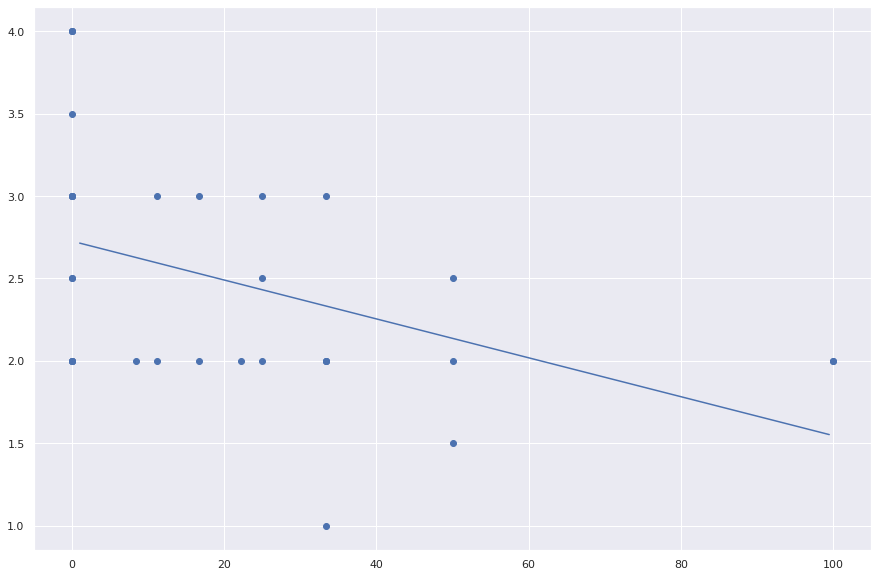

In [ ]:
plt.scatter(data_frame['material_wellbeing_improved'],data_frame['life_satisfaction_median'])
x = np.arange(1,100,0.5)
y = x* -0.0118+2.7266
plt.plot(x,y)
plt.show()

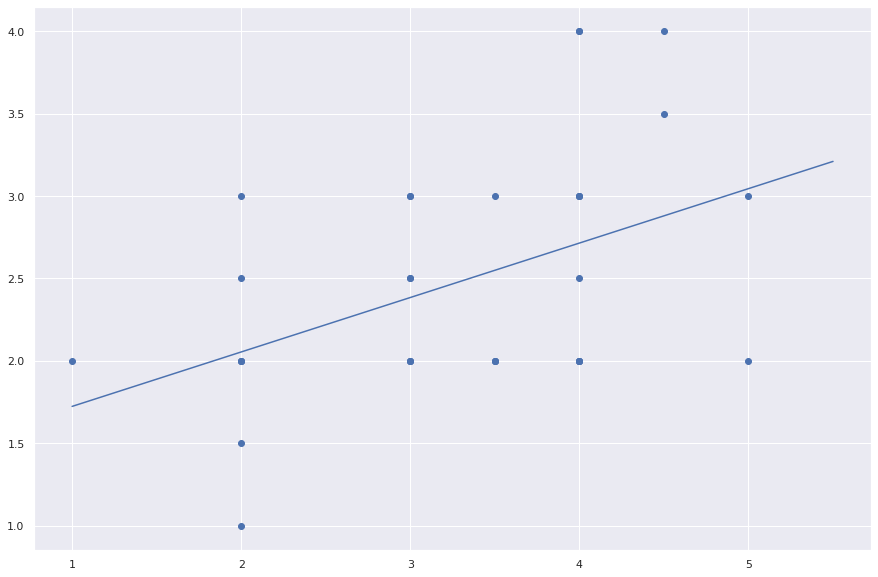

In [ ]:
plt.scatter(data_frame['money_satisfaction_median'],data_frame['life_satisfaction_median'])
x = np.arange(1,6,0.5)
y = x*0.3305+1.3931
plt.plot(x,y)
plt.show()

In [ ]:
LR('life_satisfaction_median','weight_in_kilos')

                               OLS Regression Results                               
Dep. Variable:     life_satisfaction_median   R-squared:                       0.151
Model:                                  OLS   Adj. R-squared:                  0.123
Method:                       Least Squares   F-statistic:                     5.504
Date:                      Fri, 20 May 2022   Prob (F-statistic):             0.0255
Time:                              12:55:05   Log-Likelihood:                -32.932
No. Observations:                        33   AIC:                             69.86
Df Residuals:                            31   BIC:                             72.86
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

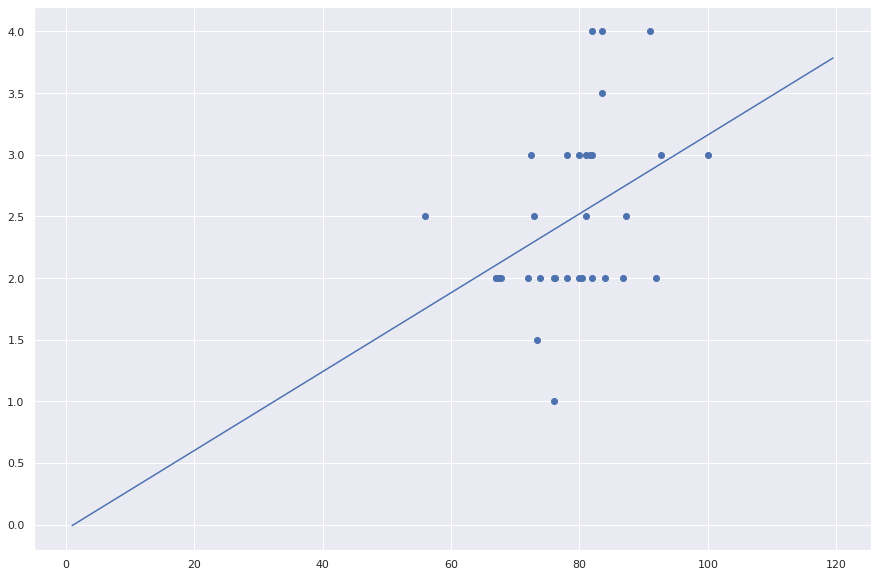

In [ ]:
plt.scatter(data_frame['weight_in_kilos'],data_frame['life_satisfaction_median'])
x = np.arange(1,120,0.5)
y = x*0.0320-0.0396
plt.plot(x,y)


In [ ]:
LR('life_satisfaction_median','xh5_pin')

                               OLS Regression Results                               
Dep. Variable:     life_satisfaction_median   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                 -0.023
Method:                       Least Squares   F-statistic:                    0.2898
Date:                      Fri, 20 May 2022   Prob (F-statistic):              0.594
Time:                              12:55:06   Log-Likelihood:                -35.475
No. Observations:                        33   AIC:                             74.95
Df Residuals:                            31   BIC:                             77.94
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
LR("life_satisfaction_median", "money_satisfaction_median", "work_conditions_satisfaction")

                               OLS Regression Results                               
Dep. Variable:     life_satisfaction_median   R-squared:                       0.367
Model:                                  OLS   Adj. R-squared:                  0.325
Method:                       Least Squares   F-statistic:                     8.711
Date:                      Fri, 20 May 2022   Prob (F-statistic):            0.00104
Time:                              12:55:06   Log-Likelihood:                -28.073
No. Observations:                        33   AIC:                             62.15
Df Residuals:                            30   BIC:                             66.64
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
import ipympl

In [ ]:
%matplotlib widget

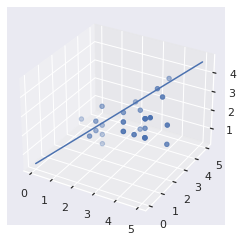

In [ ]:
ax = plt.axes(projection ="3d")
x = np.linspace(0,5,100)
y = np.linspace(0,5,100)
z = 0.4291 + 0.2431*x + 0.5991*y
ax.scatter3D(data_frame['money_satisfaction_median'],data_frame['work_conditions_satisfaction'],data_frame['life_satisfaction_median'])
ax.plot3D(x,y,z)

